In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
def polynomial_dataframe(dataframe, feature_name, degree):
    '''
    dataframe: the original dataframe with data
    feature_name: (str): name of the feature in strings for which powers needs to be found
    returns: a datafreame with the 'feature_name' as the first column and other columns are power of that
    '''
    new_df = pd.DataFrame()
    new_df = dataframe[[feature_name]]
    new_df = new_df.rename(columns={feature_name: "power_1"})
    
    for i in range(2,degree+1):
        new_df['power_'+str(i)] = new_df['power_1'].apply(lambda x: x**i)
    return new_df

In [54]:
trainData = pd.read_csv('wk3_kc_house_train_data.csv')

In [55]:
trainDataPoly1 = polynomial_dataframe(trainData, 'sqft_living', 1)

In [56]:
model1 = LinearRegression( fit_intercept=True, normalize=False).fit(np.array(trainDataPoly1),trainData['price'])
model1.coef_

array([288.59846375])

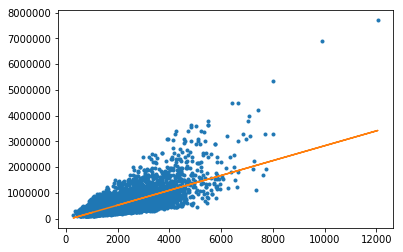

In [57]:
plt.plot(trainDataPoly1['power_1'],trainData['price'],'.',
         trainDataPoly1['power_1'], model1.predict(trainDataPoly1),'-')

In [50]:
trainDataPoly2 = polynomial_dataframe(trainData, 'sqft_living', 2)
model2 = LinearRegression( fit_intercept=True, normalize=False).fit(np.array(trainDataPoly2),trainData['price'])
model2.coef_

array([1.22673842, 0.0522949 ])

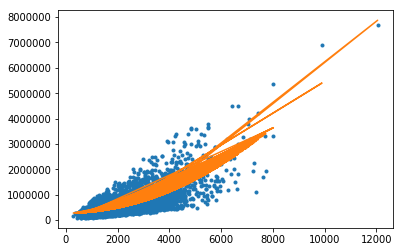

In [65]:
plt.plot(trainDataPoly2['power_1'],trainData['price'],'.',
         trainDataPoly2['power_1'], model2.predict(trainDataPoly2),'-')

In [64]:
trainDataPoly15 = polynomial_dataframe(trainData, 'sqft_living', 15)
model15 = LinearRegression( fit_intercept=True, normalize=False).fit(np.array(trainDataPoly15),trainData['price'])
model15.coef_

array([ 3.65649652e-89, -3.49017041e-49, -1.70721336e-55,  1.99136489e-59,
        3.04293598e-73,  8.36182560e-70,  5.73133489e-66,  3.83786524e-62,
        2.47884969e-58,  1.51269750e-54,  8.40594099e-51,  3.93663091e-47,
        1.24240972e-43, -2.25041880e-47,  1.01236550e-51])

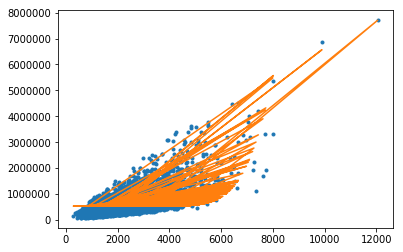

In [68]:
plt.plot(trainDataPoly15['power_1'],trainData['price'],'.',
         trainDataPoly15['power_1'], model15.predict(trainDataPoly15),'-')

## Chaging the data and relearning

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [69]:
set1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

In [72]:
set1Poly15 = polynomial_dataframe(set1, 'sqft_living', 15)
set2Poly15 = polynomial_dataframe(set2, 'sqft_living', 15)
set3Poly15 = polynomial_dataframe(set3, 'sqft_living', 15)
set4Poly15 = polynomial_dataframe(set4, 'sqft_living', 15)

In [73]:
set1model15 = LinearRegression( fit_intercept=True, normalize=False).fit(np.array(set1Poly15),set1['price'])
set1model15.coef_

array([ 3.05794168e-90, -1.69394947e-49, -5.61767568e-55, -4.97841222e-60,
        3.23082736e-74,  1.10358333e-70,  8.37724029e-67,  6.23411957e-63,
        4.49156442e-59,  3.06938763e-55,  1.91749300e-51,  1.01335180e-47,
        3.62176959e-44, -5.63501661e-48,  2.18641116e-52])

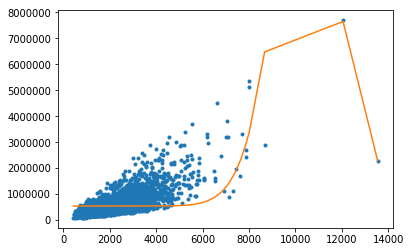

In [75]:
plt.plot(set1Poly15['power_1'],set1['price'],'.',
         set1Poly15['power_1'], set1model15.predict(set1Poly15),'-')

In [76]:
set2model15 = LinearRegression( fit_intercept=True, normalize=False).fit(np.array(set2Poly15),set2['price'])
set2model15.coef_

array([ 2.71335949e-77,  7.33541090e-39, -1.85014814e-44,  8.44628222e-50,
        5.73786179e-71,  1.51934987e-58,  3.64549616e-55,  1.50416258e-51,
        5.76015665e-48,  1.95770497e-44,  5.39396539e-41,  9.40376360e-38,
       -3.63529141e-41,  4.65476524e-45, -1.97199121e-49])

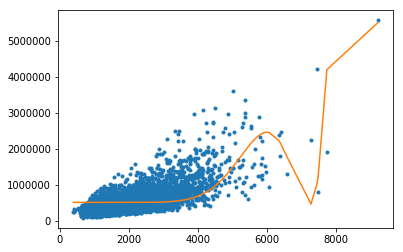

In [77]:
plt.plot(set2Poly15['power_1'],set2['price'],'.',
         set2Poly15['power_1'], set2model15.predict(set2Poly15),'-')

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**
NO

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**
NO

## Selecting a Polynomial Degree

In [125]:
trainData = pd.read_csv('wk3_kc_house_train_data.csv')
valData = pd.read_csv('wk3_kc_house_valid_data.csv')
testData = pd.read_csv('wk3_kc_house_test_data.csv')

In [126]:
#valDataPrice = valData['price']
#valData = valData['sqft_living']
#valData = valData.drop(['price','date'], axis=1)

In [127]:
rssList = []
di = {'trainPolyData':[],'valPolyData':[],'trainModel':[],}
for i in range(1,16): #because I am concerned till degree 15
    di['trainPolyData'].append(polynomial_dataframe(trainData, 'sqft_living', i))
    di['valPolyData'].append(polynomial_dataframe(valData, 'sqft_living', i))
    #trainPoly+str(i) = polynomial_dataframe(train, 'sqft_living', i)
    di['trainModel'].append(LinearRegression( fit_intercept=True, normalize=False).fit(np.array(di['trainPolyData'][len(di['trainPolyData'])-1]),trainData['price']))
    #trainmodel+str(i) = LinearRegression( fit_intercept=True, normalize=False).fit(np.array(di['trainPolyData'][len(di['trainPolyData'])-1]),train['price'])
    #predict on val data
    rssList.append(sum((di['trainModel'][len(di['trainModel'])-1].predict(di['valPolyData'][len(di['valPolyData'])-1]) - valData['price'])**2))

In [129]:
min(rssList)

566268593930554.5

In [130]:
rssList

[629097886299587.5,
 623955062706519.1,
 625820280251530.6,
 629987341468499.8,
 628240679314405.9,
 566268593930554.5,
 1073845517537453.6,
 7087872270340538.0,
 4.5303601606618904e+16,
 2.475699114375292e+17,
 1.193782560132884e+18,
 5.092665343583419e+18,
 7.616230021284306e+17,
 2.2975609250061896e+18,
 6.955038097253788e+18]

**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?** --6


**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**

In [143]:
testPoly6 = polynomial_dataframe(testData, 'sqft_living', 6) # 6 because that is where validation data has lowest RSS
#its not 5. power_1 is not iteration 1 in for loop.
#iteration 1 in for loop above is for power_2 and so on..so forth

In [144]:
testPoly6

,power_1,power_2,power_3,power_4,power_5,power_6
0,1890,3572100,6751269000,12759898410000,24116207994900000,45579633110361000000
1,1810,3276100,5929741000,10732831210000,19426424490100000,35161828327081000000
2,1200,1440000,1728000000,2073600000000,2488320000000000,2985984000000000000
3,2330,5428900,12649337000,29472955210000,68671985639300000,160005726539569000000
4,1220,1488400,1815848000,2215334560000,2702708163200000,3297303959104000000
...,...,...,...,...,...,...
2212,1980,3920400,7762392000,15369536160000,30431681596800000,60254729561664000000
2213,2198,4831204,10618986392,23340532089616,51302489532975968,112762871993481177664
2214,2850,8122500,23149125000,65975006250000,188028767812500000,535881988265625000000
2215,1140,1299600,1481544000,1688960160000,1925414582400000,2194972623936000000


In [137]:
#sum((di['trainModel'][5].predict(testPoly5) - testData['price'])**2)

In [138]:
#di['trainModel'][5].predict(testPoly5)

In [145]:
di['trainPolyData'][5]

,power_1,power_2,power_3,power_4,power_5,power_6
0,1960,3841600,7529536000,14757890560000,28925465497600000,56693912375296000000
1,5420,29376400,159220088000,862972876960000,4677312993123200000,25351036422727744000000
2,1160,1345600,1560896000,1810639360000,2100341657600000,2436396322816000000
3,1430,2044900,2924207000,4181616010000,5979710894300000,8550986578849000000
4,1370,1876900,2571353000,3522753610000,4826172445700000,6611856250609000000
...,...,...,...,...,...,...
9756,1490,2220100,3307949000,4928844010000,7343977574900000,10942526586601000000
9757,2520,6350400,16003008000,40327580160000,101625502003200000,256096265048064000000
9758,3510,12320100,43243551000,151784864010000,532764872675100000,1870004703089601000000
9759,1020,1040400,1061208000,1082432160000,1104080803200000,1126162419264000000


In [146]:
sum((di['trainModel'][5].predict(testPoly6) - testData['price'])**2)

135225114656218.83